# COLAB SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys, os

if 'google.colab' in sys.modules:
    ! git clone https://github.com/birshert/attack-lang-models

    %cd attack-lang-models
    
    ! pip install -r requirements.txt
    
    import nltk
    nltk.download('punkt')
    
    ! cp /content/drive/MyDrive/*.pth /content/attack-lang-models/models/

# MAIN BODY

In [1]:
import model

In [2]:
model_ = model.Model()
model_.load_models()

In [3]:
model_.russian_forward()
model_.russian_hook()

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [8]:
import torch

a = tokenizer.encode("My cat is big.", return_tensors='pt', max_length=10, padding='max_length')
b = tokenizer.encode("My <mask> is big.", return_tensors='pt', max_length=10, padding='max_length')

In [9]:
optimizer = torch.optim.Adam(model_.mlm_model.parameters())

In [10]:
for i in range(30):
    optimizer.zero_grad()
    loss = model_(a, b)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        logits = model_.mlm_model(b).logits
        token = torch.argmax(logits[:, torch.where(b == tokenizer.mask_token_id)[1], :]).item()
        
        print(f'token {tokenizer.decode([token])}, loss {loss.item():.5f}')

token справедливо, loss 0.24038
token ал, loss 0.24038
token справедливо, loss 0.20827
token явно, loss 0.22216
token статистика, loss 0.21980
token сына, loss 0.23495
token статистика, loss 0.20693
token брата, loss 0.30854
token брата, loss 0.21616
token брата, loss 0.30854
token брата, loss 0.25204
token сына, loss 0.30854
token сына, loss 0.21616
token сына, loss 0.21917
token тура, loss 0.25204
token сына, loss 0.25204
token сына, loss 0.22359
token тура, loss 0.26160
token неба, loss 0.22657
token неба, loss 0.25204
token сына, loss 0.21818
token сына, loss 0.25204
token сына, loss 0.21818
token сына, loss 0.25204
token неба, loss 0.25204
token неба, loss 0.21257
token сына, loss 0.22657
token сына, loss 0.21367
token <s>, loss 0.21201
token школу, loss 0.21153


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [19]:
a = tokenizer.encode("My cat is big.", return_tensors='pt', max_length=30, padding='max_length')
b = tokenizer.encode("My попугай is big.", return_tensors='pt', max_length=30, padding='max_length')

t1 = model_.emb_model(a).pooler_output
t2 = model_.emb_model(b).pooler_output

normalized_embeddings_1 = torch.nn.functional.normalize(t1, p=2)
normalized_embeddings_2 = torch.nn.functional.normalize(t2, p=2)

normalized_embeddings_1 @ normalized_embeddings_2.transpose(1, 0)

tensor([[0.8283]])

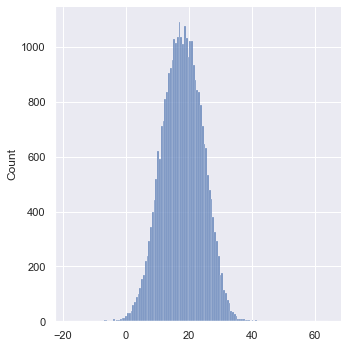

In [9]:
sns.displot(logits[:, torch.where(b == tokenizer.mask_token_id)[1], :].flatten()[model_.russian_tokens_mask])
plt.show()

In [13]:
model_.mlm_model.lm_head.decoder.weight[model_.russian_tokens_mask]

tensor([[ 0.1505,  0.0263, -0.1766,  ..., -0.1548, -0.0403,  0.0768],
        [ 0.2227,  0.0364, -0.0573,  ...,  0.3838,  0.0684,  0.1920],
        [ 0.1024,  0.2529, -0.1238,  ...,  0.1652, -0.0390,  0.2206],
        ...,
        [ 0.1360,  0.0983,  0.0132,  ..., -0.0748,  0.0534, -0.0573],
        [-0.1146,  0.0423,  0.0690,  ..., -0.0237,  0.0953,  0.0247],
        [-0.1553, -0.1293,  0.0994,  ...,  0.2360,  0.0583,  0.2085]],
       grad_fn=<IndexBackward>)